In [ ]:
!git clone https://github.com/isaacuribej/speed_Dating_Project-

fatal: destination path 'speed_Dating_Project-' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
date = pd.read_csv('/content/speed_Dating_Project-/data_clean.csv')
date.shape

(8378, 67)

In [ ]:
date.head(10)

,Unnamed: 0,gender,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,...,amb3_1,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,0.0,0.0,0.557471,0.0,0.243243,0.2,0.3500,0.333333,0.4000,...,0.625,0.6,0.9,0.7,0.7,0.6,0.5,0.7,0.600000,0.250000
1,1,0.0,0.0,0.787356,0.0,0.108108,0.2,0.6000,0.000000,0.0000,...,0.625,0.7,0.8,0.7,0.8,0.5,0.6,0.7,0.500000,0.125000
2,2,0.0,1.0,0.568966,1.0,0.108108,0.6,0.1900,0.300000,0.3800,...,0.625,0.5,0.8,0.9,0.8,0.5,0.7,0.7,0.520752,0.125000
3,3,0.0,1.0,0.827586,0.0,0.135135,0.2,0.3000,0.083333,0.3000,...,0.625,0.7,0.6,0.8,0.7,0.6,0.8,0.7,0.600000,0.250000
4,4,0.0,1.0,0.597701,0.0,0.162162,0.4,0.3000,0.166667,0.4000,...,0.625,0.5,0.6,0.7,0.7,0.6,0.6,0.6,0.600000,0.250000
5,5,0.0,0.0,0.620690,0.0,0.189189,0.2,0.5000,0.000000,0.6000,...,0.625,0.4,0.9,0.7,0.4,0.6,0.4,0.6,0.500000,0.250000
6,6,0.0,0.0,0.672414,0.0,0.324324,0.2,0.3500,0.250000,0.5000,...,0.625,0.7,0.6,0.7,0.4,0.6,0.7,0.6,0.500000,0.250000
7,7,0.0,0.0,0.764368,0.0,0.243243,0.2,0.3333,0.185167,0.2222,...,0.625,0.4,0.9,0.7,0.6,0.5,0.6,0.6,0.700000,0.118596
8,8,0.0,1.0,0.637931,0.0,0.270270,0.2,0.5000,0.000000,0.5000,...,0.625,0.7,0.6,0.8,0.9,0.8,0.8,0.7,0.700000,0.250000
9,9,0.0,0.0,0.270115,0.0,0.162162,0.2,1.0000,0.000000,0.0000,...,0.625,0.5,0.6,0.6,0.8,1.0,0.8,0.6,0.600000,0.250000


# Exploracion de la variable objetivo
genera una tabla de contingencia que muestra cuántas veces aparece cada valor único de la variable match en el DataFrame dating. La tabla tendrá una sola columna llamada "count" que contiene los recuentos de las ocurrencias de cada valor único en la variable match.

In [ ]:
pd.crosstab(index=date['match'],columns="count")

col_0,count
match,
0.0,6998
1.0,1380



#HEATMAP
Se crea un mapa de calor de correlación que muestra la relación entre las variables en el DataFrame date. Puede ayudar a identificar patrones y relaciones entre las variables a través de la codificación de colores en la matriz de correlación.

El mapa de calor representa visualmente las correlaciones entre las diferentes variables del conjunto de datos, donde los colores y tonos indican el grado de correlación.

<Axes: title={'center': 'Correlation Heatmap'}>

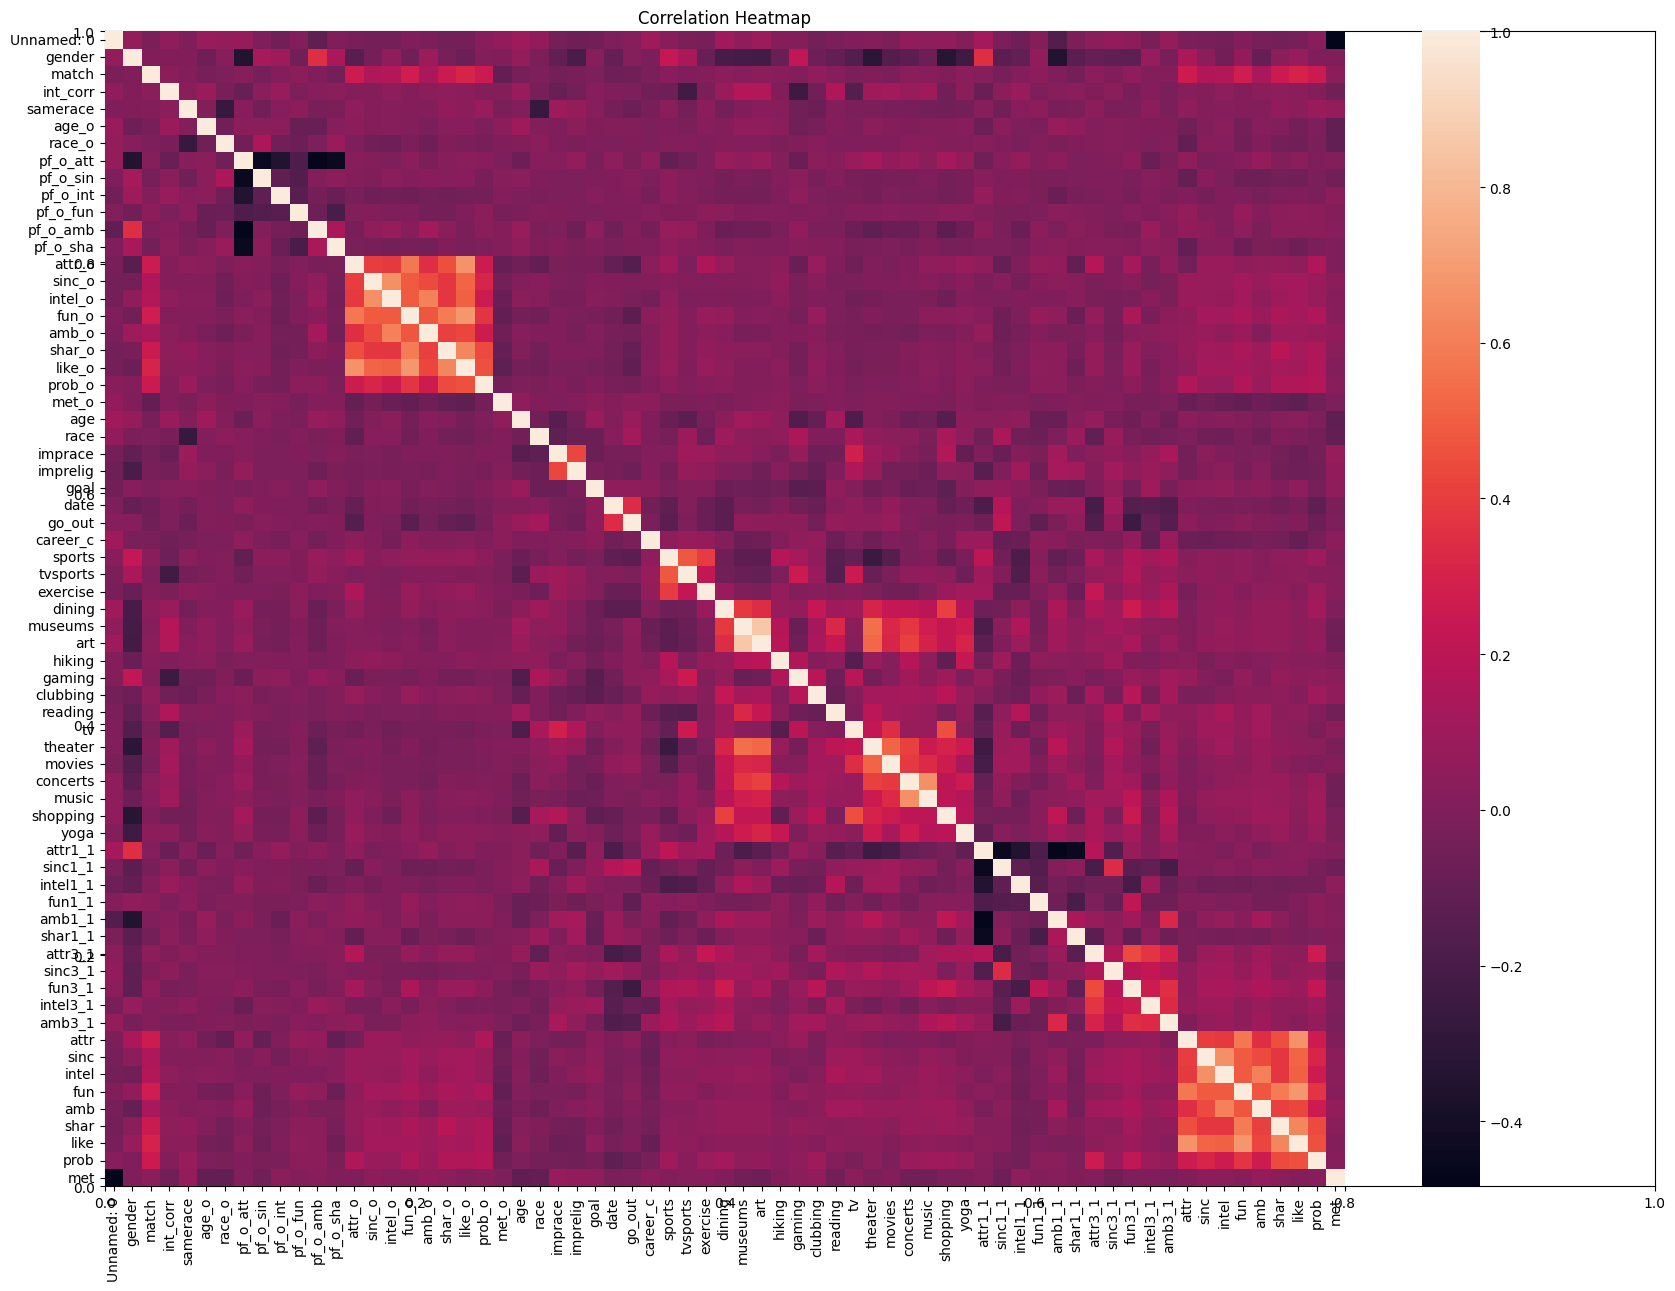

In [ ]:

plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Entrenamiento

Luego nos encargamos de dividir el conjunto de datos en un conjunto de entrenamiento y prueba y luego preparar las características (X) y las etiquetas (y) del conjunto de entrenamiento para su uso en un modelo de aprendizaje automático. Esto es una práctica común al trabajar con machine learning, donde se divide el conjunto de datos para entrenar y evaluar modelos.

In [ ]:
train, test = train_test_split(date, test_size = 0.30)

Seleccionamos X, y de los datos definidos para el entrenamiento de los modelos.

In [ ]:
X = train.drop("match", axis=1)
y = train["match"]

Se procede a entrenar 6 modelos diferentes de clasificación aplicando los correspondientes hyperparametros obteniendo resultados aceptables dentro de las metricas de rendimiento para los aciertos pero un recall por debajo de los esperado.

In [ ]:
models = {}
models['DecisionTree'] = DecisionTreeClassifier(max_depth=3).fit(X,y)
models['LogisticRegression'] = LogisticRegression(max_iter = 500).fit(X,y)
models['SV'] = SVC(gamma=2, max_iter=300).fit(X,y)
models['SGD'] = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=300).fit(X,y)
models['Ridge'] = RidgeClassifier(max_iter=300).fit(X,y)
models['RandomForest'] = RandomForestClassifier(n_estimators=2, max_depth=5).fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Prueba de los modelos con los datos de entrenamiento, se obtienen las metricas de Accuracy y Recall

In [ ]:
y_preds = {}
for key, model in models.items():
  y_preds[key]=(model.predict(X))
for key, y_pred in y_preds.items():
  print(f'Accur {round(accuracy_score(y, y_pred),4)} para {key}')
  print(f'Rcall {round(recall_score(y, y_pred),4)} para {key}')

Accur 0.8448 para DecisionTree
Rcall 0.3522 para DecisionTree
Accur 0.8521 para LogisticRegression
Rcall 0.2688 para LogisticRegression
Accur 0.8958 para SV
Rcall 0.3718 para SV
Accur 0.8329 para SGD
Rcall 0.0062 para SGD
Accur 0.8527 para Ridge
Rcall 0.1442 para Ridge
Accur 0.8545 para RandomForest
Rcall 0.1988 para RandomForest


Prueba de los modelos con los datos de prueba, se obtienen las metricas de Accuracy y Recall

In [ ]:
X = test.drop("match", axis=1)
y = test["match"]

y_preds = {}
for key, model in models.items():
  y_preds[key]=(model.predict(X))
for key, y_pred in y_preds.items():
  print(f'Accur {round(accuracy_score(y, y_pred),4)} para {key}')
  print(f'Rcall {round(recall_score(y, y_pred),4)} para {key}')

Accur 0.8477 para DecisionTree
Rcall 0.3619 para DecisionTree
Accur 0.8512 para LogisticRegression
Rcall 0.2616 para LogisticRegression
Accur 0.8154 para SV
Rcall 0.0611 para SV
Accur 0.8329 para SGD
Rcall 0.0049 para SGD
Accur 0.8572 para Ridge
Rcall 0.1589 para Ridge
Accur 0.8516 para RandomForest
Rcall 0.198 para RandomForest


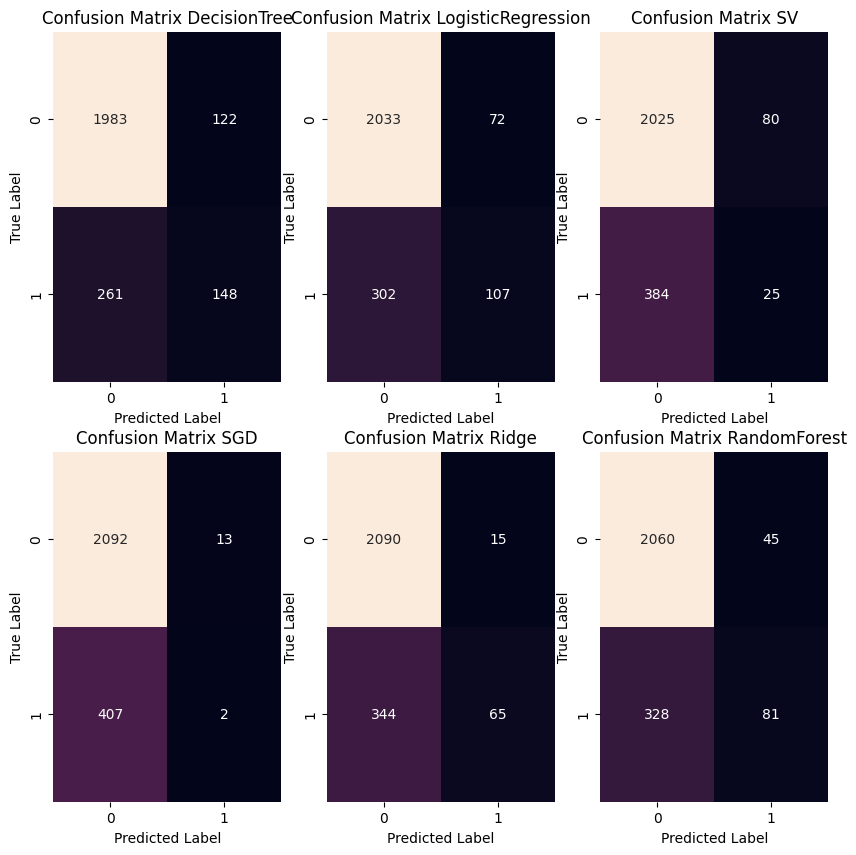

In [ ]:
#MATRIZ DE CONFUSION

plt.figure(figsize=(10,10))
i = 1
for key, y_pred in y_preds.items():
    ax = plt.subplot(2,int(len(y_preds)/2),i)
    i+=1
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm,annot=True,cbar=False, fmt="d")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'Confusion Matrix {key}')
    #los datos no son linealmente separables y ademas presentan alta dispersion

Ejemplo para graficar el arbol binario

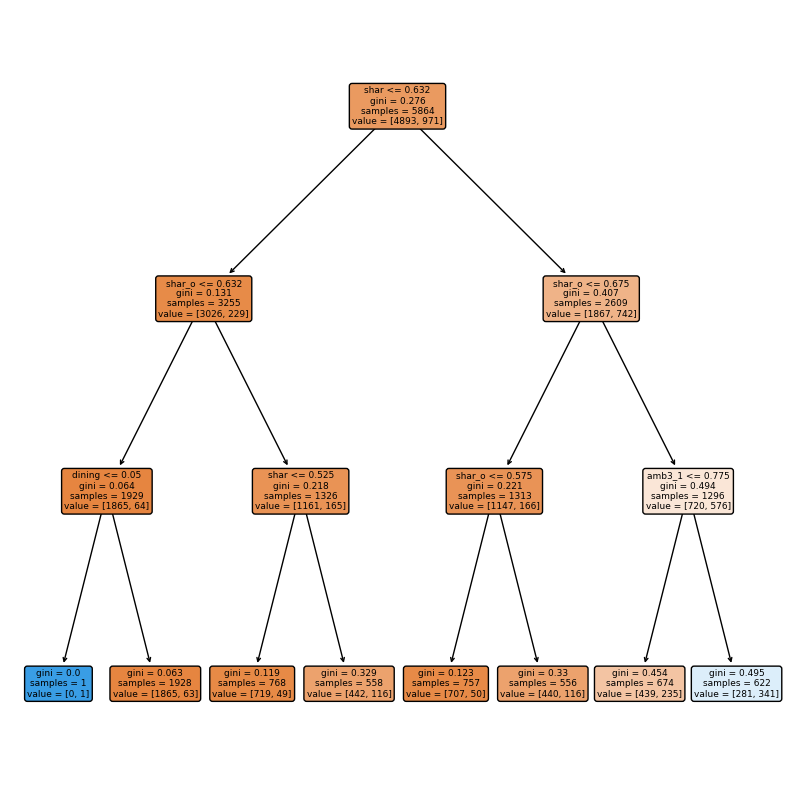

In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(10, 10))
plot_tree(models['DecisionTree'], feature_names=date.columns, filled=True, rounded=True)
plt.show()

# Modelos no supervisados #

Utilizando Kmeans sombre todo el dataset no se obtienen resultados satisfactorios, con un n_clusters = 2 el modelo clasifica en 50/50, teniendo un resultado de acierto aproximado del 50% para todas las pruebas realizadas.

In [ ]:
X = date.drop("match", axis=1)
y = date["match"]

In [ ]:
km = KMeans(n_clusters=2, n_init='auto')
km.fit(X)
y_pred = km.predict(X)
y.shape

(8378,)

In [ ]:
pd.Series(y_pred).value_counts() #Resultado de la clasificación

1    4191
0    4187
dtype: int64

In [ ]:
round(accuracy_score(y, y_pred),4)#Porcentaje de acierto con respecto a la varialbe objetivo

0.505

Devido al alto numero de atributos no es posible nostrar graficamente el comportamiento de los centros de los cluster

In [ ]:
km.cluster_centers_

array([[6.28450000e+03, 5.31055901e-01, 5.90088198e-01, 4.01815576e-01,
        2.36140416e-01, 3.62482217e-01, 2.39880657e-01, 2.86439007e-01,
        4.02412656e-01, 3.49520254e-01, 1.85480552e-01, 3.80959355e-01,
        5.88121373e-01, 7.16685953e-01, 7.33650236e-01, 5.84600754e-01,
        6.76447058e-01, 5.41545763e-01, 6.10515496e-01, 5.29629094e-01,
        1.39383602e-01, 2.36887022e-01, 3.62387628e-01, 3.60363644e-01,
        2.83186349e-01, 2.12596196e-01, 6.57763127e-01, 1.92148729e-01,
        3.01690158e-01, 6.10106673e-01, 3.97724390e-01, 5.74091970e-01,
        7.74693038e-01, 7.01324885e-01, 6.87676844e-01, 5.75561608e-01,
        2.79409003e-01, 5.62430668e-01, 5.49764763e-01, 4.83425096e-01,
        6.83910475e-01, 7.90323600e-01, 6.99435385e-01, 7.73592943e-01,
        5.36948258e-01, 4.43499510e-01, 2.44347195e-01, 2.86120253e-01,
        3.96907469e-01, 3.48793348e-01, 1.82270626e-01, 3.82766258e-01,
        6.31283533e-01, 7.90279380e-01, 7.23097392e-01, 7.620931